In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel("../dataset/주가데이터자료(2021포함).xlsx")
data = pd.read_csv("../dataset/이자보상배율최종.csv", encoding='CP949')

In [3]:
# 년도 별로 바꾸기
df_1 =df[df["거래월(*)"]==3]
df_2 =df[df["거래월(*)"]==3]
df_1=df_1.reset_index(drop="index")
df_2=df_2.reset_index(drop="index")

In [4]:
#
for i in df_1.index:
    if i > 0:
        if df_1.iloc[:,1][i] == df_1.iloc[:,1][i-1]:
            df_1.loc[i,"주가변동률"] = (df_1.loc[i,"종가(원)"]-df_1.loc[i-1,"종가(원)"])/df_1.loc[i,"종가(원)"]
        elif df_1.iloc[:,1][i] != df_1.iloc[:,1][i-1]:
            df_1.loc[i,"주가변동률"] = 100           

In [5]:
df_1[15:30]

,회사명,거래소코드,회계년도,종가(원),거래량(주),거래소코드.1,거래년도(*),거래월(*),거래일수,발행주식 액면가(원),발행주식 보통주,발행주식 우선주,주가변동률
15,(주)ES큐브,50120,2013/12,2135.0,20171861.0,50120.0,2013.0,3.0,20.0,5000,13564086,0,-0.615925
16,(주)ES큐브,50120,2014/12,1695.0,8909047.0,50120.0,2014.0,3.0,21.0,5000,13564086,0,-0.259587
17,(주)ES큐브,50120,2015/12,1480.0,7023419.0,50120.0,2015.0,3.0,22.0,5000,13564086,0,-0.145270
18,(주)ES큐브,50120,2016/12,1800.0,10863643.0,50120.0,2016.0,3.0,22.0,5000,13564086,0,0.177778
19,(주)ES큐브,50120,2017/12,2145.0,17480698.0,50120.0,2017.0,3.0,22.0,5000,13564086,0,0.160839
20,(주)ES큐브,50120,2018/12,1175.0,50770886.0,50120.0,2018.0,3.0,21.0,5000,13564086,0,-0.825532
21,(주)ES큐브,50120,2019/12,810.0,39482985.0,50120.0,2019.0,3.0,20.0,5000,13564086,0,-0.450617
22,(주)ES큐브,50120,2020/12,603.0,23547298.0,50120.0,2020.0,3.0,22.0,5000,13564086,0,-0.343284
23,(주)ES큐브,50120,2021/12,5120.0,1754315.0,50120.0,2021.0,3.0,22.0,5000,13564086,0,0.882227
24,(주)가비아,79940,2010/12,2600.0,12494480.0,79940.0,2010.0,3.0,22.0,500,13535684,0,100.000000


In [6]:
df_1['회계년도'] = pd.to_datetime(df_1['회계년도'])


In [7]:
df_1['year'] = df_1['회계년도'].dt.year-1
df_1


,회사명,거래소코드,회계년도,종가(원),거래량(주),거래소코드.1,거래년도(*),거래월(*),거래일수,발행주식 액면가(원),발행주식 보통주,발행주식 우선주,주가변동률,year
0,(주)CMG제약,58820,2010-12-01,695.0,9923482.0,58820.0,2010.0,3.0,22.0,500,138892244,0,NaN,2009
1,(주)CMG제약,58820,2011-12-01,950.0,16852826.0,58820.0,2011.0,3.0,22.0,500,138892244,0,0.268421,2010
2,(주)CMG제약,58820,2012-12-01,810.0,44180371.0,58820.0,2012.0,3.0,21.0,500,138892244,0,-0.172840,2011
3,(주)CMG제약,58820,2013-12-01,1765.0,19375570.0,58820.0,2013.0,3.0,20.0,500,138892244,0,0.541076,2012
4,(주)CMG제약,58820,2014-12-01,1080.0,9335543.0,58820.0,2014.0,3.0,21.0,500,138892244,0,-0.634259,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,흥구석유(주),24060,2017-12-01,3055.0,914118.0,24060.0,2017.0,3.0,22.0,100,15000000,0,-0.207856,2016
13125,흥구석유(주),24060,2018-12-01,2765.0,278861.0,24060.0,2018.0,3.0,21.0,100,15000000,0,-0.104882,2017
13126,흥구석유(주),24060,2019-12-01,3695.0,37275060.0,24060.0,2019.0,3.0,20.0,100,15000000,0,0.251691,2018
13127,흥구석유(주),24060,2020-12-01,5280.0,19097978.0,24060.0,2020.0,3.0,22.0,100,15000000,0,0.300189,2019


In [8]:
df_1.drop(0, axis=0)

,회사명,거래소코드,회계년도,종가(원),거래량(주),거래소코드.1,거래년도(*),거래월(*),거래일수,발행주식 액면가(원),발행주식 보통주,발행주식 우선주,주가변동률,year
1,(주)CMG제약,58820,2011-12-01,950.0,16852826.0,58820.0,2011.0,3.0,22.0,500,138892244,0,0.268421,2010
2,(주)CMG제약,58820,2012-12-01,810.0,44180371.0,58820.0,2012.0,3.0,21.0,500,138892244,0,-0.172840,2011
3,(주)CMG제약,58820,2013-12-01,1765.0,19375570.0,58820.0,2013.0,3.0,20.0,500,138892244,0,0.541076,2012
4,(주)CMG제약,58820,2014-12-01,1080.0,9335543.0,58820.0,2014.0,3.0,21.0,500,138892244,0,-0.634259,2013
5,(주)CMG제약,58820,2015-12-01,1170.0,25880775.0,58820.0,2015.0,3.0,22.0,500,138892244,0,0.076923,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,흥구석유(주),24060,2017-12-01,3055.0,914118.0,24060.0,2017.0,3.0,22.0,100,15000000,0,-0.207856,2016
13125,흥구석유(주),24060,2018-12-01,2765.0,278861.0,24060.0,2018.0,3.0,21.0,100,15000000,0,-0.104882,2017
13126,흥구석유(주),24060,2019-12-01,3695.0,37275060.0,24060.0,2019.0,3.0,20.0,100,15000000,0,0.251691,2018
13127,흥구석유(주),24060,2020-12-01,5280.0,19097978.0,24060.0,2020.0,3.0,22.0,100,15000000,0,0.300189,2019


In [9]:
for i in df_1.index:
    if df_1.loc[i,"year"] == 2010:
        df_1 =df_1.drop(i,axis=0)
    elif df_1.loc[i,"year"] == 2009:
        df_1 =df_1.drop(i,axis=0)
    elif df_1.loc[i,"주가변동률"] ==100:
        df_1 = df_1.drop(i,axis=0)
        


In [10]:
df_1= df_1.drop(["회계년도","거래량(주)","거래소코드.1","거래일수"],axis=1)
    

In [11]:
df_1 = df_1[["회사명","거래소코드","종가(원)","주가변동률","year"]]
df_1

,회사명,거래소코드,종가(원),주가변동률,year
2,(주)CMG제약,58820,810.0,-0.172840,2011
3,(주)CMG제약,58820,1765.0,0.541076,2012
4,(주)CMG제약,58820,1080.0,-0.634259,2013
5,(주)CMG제약,58820,1170.0,0.076923,2014
6,(주)CMG제약,58820,3265.0,0.641654,2015
...,...,...,...,...,...
13124,흥구석유(주),24060,3055.0,-0.207856,2016
13125,흥구석유(주),24060,2765.0,-0.104882,2017
13126,흥구석유(주),24060,3695.0,0.251691,2018
13127,흥구석유(주),24060,5280.0,0.300189,2019


In [13]:
df_1 = df_1.reset_index(drop="index")
df_1.to_csv("../dataset/주가만있는자료.csv",encoding='cp949')

In [14]:
df_2["수정종가"]= df_2["종가(원)"]/df_2["발행주식 액면가(원)"]

In [15]:
for i in df_2.index:
    if i > 0:
        if df_2.iloc[:,1][i] == df_2.iloc[:,1][i-1]:
            df_2.loc[i,"주가변동률"] = (df_2.loc[i,"종가(원)"]-df_2.loc[i-1,"종가(원)"])/df_2.loc[i,"종가(원)"]
        elif df_2.iloc[:,1][i] != df_2.iloc[:,1][i-1]:
            df_2.loc[i,"주가변동률"] = 100     

In [16]:
df_2['회계년도'] = pd.to_datetime(df_2['회계년도'])
df_2['year'] = df_2['회계년도'].dt.year
df_2

,회사명,거래소코드,회계년도,종가(원),거래량(주),거래소코드.1,거래년도(*),거래월(*),거래일수,발행주식 액면가(원),발행주식 보통주,발행주식 우선주,수정종가,주가변동률,year
0,(주)CMG제약,58820,2010-12-01,695.0,9923482.0,58820.0,2010.0,3.0,22.0,500,138892244,0,1.39,NaN,2010
1,(주)CMG제약,58820,2011-12-01,950.0,16852826.0,58820.0,2011.0,3.0,22.0,500,138892244,0,1.90,0.268421,2011
2,(주)CMG제약,58820,2012-12-01,810.0,44180371.0,58820.0,2012.0,3.0,21.0,500,138892244,0,1.62,-0.172840,2012
3,(주)CMG제약,58820,2013-12-01,1765.0,19375570.0,58820.0,2013.0,3.0,20.0,500,138892244,0,3.53,0.541076,2013
4,(주)CMG제약,58820,2014-12-01,1080.0,9335543.0,58820.0,2014.0,3.0,21.0,500,138892244,0,2.16,-0.634259,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,흥구석유(주),24060,2017-12-01,3055.0,914118.0,24060.0,2017.0,3.0,22.0,100,15000000,0,30.55,-0.207856,2017
13125,흥구석유(주),24060,2018-12-01,2765.0,278861.0,24060.0,2018.0,3.0,21.0,100,15000000,0,27.65,-0.104882,2018
13126,흥구석유(주),24060,2019-12-01,3695.0,37275060.0,24060.0,2019.0,3.0,20.0,100,15000000,0,36.95,0.251691,2019
13127,흥구석유(주),24060,2020-12-01,5280.0,19097978.0,24060.0,2020.0,3.0,22.0,100,15000000,0,52.80,0.300189,2020


In [17]:
for i in df_2.index:
    if df_2.loc[i,"year"] == 2010:
        df_2 =df_2.drop(i,axis=0)
    elif df_2.loc[i,"year"] == 2009:
        df_2 =df_2.drop(i,axis=0)
    elif df_2.loc[i,"주가변동률"] ==100:
        df_2 = df_2.drop(i,axis=0)

In [18]:
df_2= df_2.drop(["회계년도","거래량(주)","거래소코드.1","거래일수"],axis=1)

In [19]:
df_2

,회사명,거래소코드,종가(원),거래년도(*),거래월(*),발행주식 액면가(원),발행주식 보통주,발행주식 우선주,수정종가,주가변동률,year
1,(주)CMG제약,58820,950.0,2011.0,3.0,500,138892244,0,1.90,0.268421,2011
2,(주)CMG제약,58820,810.0,2012.0,3.0,500,138892244,0,1.62,-0.172840,2012
3,(주)CMG제약,58820,1765.0,2013.0,3.0,500,138892244,0,3.53,0.541076,2013
4,(주)CMG제약,58820,1080.0,2014.0,3.0,500,138892244,0,2.16,-0.634259,2014
5,(주)CMG제약,58820,1170.0,2015.0,3.0,500,138892244,0,2.34,0.076923,2015
...,...,...,...,...,...,...,...,...,...,...,...
13124,흥구석유(주),24060,3055.0,2017.0,3.0,100,15000000,0,30.55,-0.207856,2017
13125,흥구석유(주),24060,2765.0,2018.0,3.0,100,15000000,0,27.65,-0.104882,2018
13126,흥구석유(주),24060,3695.0,2019.0,3.0,100,15000000,0,36.95,0.251691,2019
13127,흥구석유(주),24060,5280.0,2020.0,3.0,100,15000000,0,52.80,0.300189,2020


In [20]:
data.head()


,회사명,거래소코드,회계년도,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.75,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.70,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.60,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.22,2015,12,0


In [21]:
df_1= df_1.reset_index()

In [22]:
data.head()

,회사명,거래소코드,회계년도,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.75,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.70,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.60,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.22,2015,12,0


In [23]:
data2 = pd.merge(data,df_2,how='left',on=['회사명','year'])

In [24]:
data2

,회사명,거래소코드_x,회계년도,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,label,거래소코드_y,종가(원),거래년도(*),거래월(*),발행주식 액면가(원),발행주식 보통주,발행주식 우선주,수정종가,주가변동률
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,0,58820.0,950.0,2011.0,3.0,500.0,138892244.0,0.0,1.90,0.268421
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,0,58820.0,810.0,2012.0,3.0,500.0,138892244.0,0.0,1.62,-0.172840
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,0,58820.0,1765.0,2013.0,3.0,500.0,138892244.0,0.0,3.53,0.541076
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,0,58820.0,1080.0,2014.0,3.0,500.0,138892244.0,0.0,2.16,-0.634259
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,0,58820.0,1170.0,2015.0,3.0,500.0,138892244.0,0.0,2.34,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,0,24060.0,3690.0,2016.0,3.0,100.0,15000000.0,0.0,36.90,0.311653
10648,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,0,24060.0,3055.0,2017.0,3.0,100.0,15000000.0,0.0,30.55,-0.207856
10649,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,0,24060.0,2765.0,2018.0,3.0,100.0,15000000.0,0.0,27.65,-0.104882
10650,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,0,24060.0,3695.0,2019.0,3.0,100.0,15000000.0,0.0,36.95,0.251691


In [25]:
data2["거래소코드_y"]=data2["거래소코드_y"].fillna(10000)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10652 entries, 0 to 10651
Data columns (total 67 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   회사명               10652 non-null  object 
 1   거래소코드_x           10652 non-null  int64  
 2   회계년도              10652 non-null  object 
 3   상장일               10652 non-null  object 
 4   상장폐지일             698 non-null    object 
 5   산업명               10652 non-null  object 
 6   소속코드              10652 non-null  int64  
 7   [제조]매출액증가율        10652 non-null  float64
 8   [제조]유형자산증가율       10652 non-null  float64
 9   [제조]비유동자산증가율      10652 non-null  float64
 10  [제조]총자본증가율        10652 non-null  float64
 11  [제조]자기자본증가율       10652 non-null  float64
 12  [제조]유동자산증가율       10652 non-null  float64
 13  [제조]순이익증가율        10652 non-null  float64
 14  [제조]재고자산증가율       10652 non-null  float64
 15  [제조]매출액총이익률       10652 non-null  float64
 16  [제조]매출액순이익률       10652 non-null  float6

In [26]:
for i in data2.index:
    if data2.loc[i,"거래소코드_y"] == 10000 :
        data2= data2.drop(i,axis=0)
    

In [27]:
data2 =data2.reset_index(drop="index")


In [28]:
# data2.to_excel("주식데이터(완).xlsx")

In [29]:
data2.columns


Index(['회사명', '거래소코드_x', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', '[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)', 'year', 'month', 'label', '거래소코드_y',
       '종가(원)', '거래년도(*)', '거래월(*)', '발행주식 액면가(원)', '발행주식 보통주', '발행주식 우선주',
       '수정종가', '주가변동률'],
      dtype='object'

In [30]:
data3 = data2.drop(['회사명','거래소코드_x','회계년도','상장일','상장폐지일','산업명','소속코드',
                    '거래소코드_y', 'year', 'month', 'label'],axis=1)


In [31]:
data3.columns


Index(['[제조]매출액증가율', '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율',
       '[제조]자기자본증가율', '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율',
       '[제조]매출액총이익률', '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률',
       '[제조]자기자본순이익률', '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률',
       '[제조]비유동자산회전률', '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률',
       '[제조]매입채무회전기간', '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간',
       '[제조]운전자본회전률', '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율',
       '[제조]당좌비율', '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율',
       '[제조]비유동비율', '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율',
       '[제조]설비투자효율', '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율',
       '[제조]이윤분배율', '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)', '종가(원)', '거래년도(*)',
       '거래월(*)', '발행주식 액면가(원)', '발행주식 보통주', '발행주식 우선주', '수정종가', '주가변동률'],
      dtype='object')

In [32]:
data3 = data3[['[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', 
                '[제조]비유동자산회전률', '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율','[제조]이자보상배율(이자비용)','주가변동률']]

In [33]:
data3

,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),주가변동률
0,1.98,2.52,406.28,1.38,2.45,0.86,15.10,82.55,89.82,3.530000,0.268421
1,109.15,-9.65,332.74,1.48,1.85,0.42,68.81,95.69,1749.87,-7.750000,-0.172840
2,-2.09,2.81,235.52,1.47,2.07,0.42,394.63,113.12,71.28,0.700000,0.541076
3,3.86,1.25,262.65,0.96,1.86,0.56,101.24,113.13,79.30,3.600000,-0.634259
4,-2.64,-4.30,306.26,0.90,2.10,0.75,29.00,106.02,144.10,-32.220000,0.076923
...,...,...,...,...,...,...,...,...,...,...,...
9728,1.39,1.35,9589.39,2.24,29.72,8.24,40.08,4611.84,48.08,7.660000,0.311653
9729,0.98,0.97,10367.77,2.42,27.11,7.20,17.75,4650.29,47.63,5.910000,-0.207856
9730,-5.89,1.54,11080.55,2.62,31.01,8.08,105.67,4696.15,47.47,12.660000,-0.104882
9731,11.24,0.87,10044.58,2.44,31.51,6.91,49.75,5133.42,22.19,252.020000,0.251691


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
# corr 시각화
def corr_heatmap(dataset):
    """[상관관계 그래프]

    Args:
        dataset ([DataFrame]): [데이터프래임을 입력해주세요]
    """
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(np.bool) 
    sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 6}, linewidths=.5, mask=mask_ut)
    plt.figure(figsize=(40,40))
    plt.show()

In [35]:
from scipy.stats import pearsonr
print(data3.corr(method='pearson'))


                  [제조]총자본증가율  [제조]총자본사업이익률  [제조]1주당매출액  [제조]비유동자산회전률  \
[제조]총자본증가율          1.000000      0.197861    0.020973      0.010316   
[제조]총자본사업이익률        0.197861      1.000000    0.140909      0.151278   
[제조]1주당매출액          0.020973      0.140909    1.000000      0.099320   
[제조]비유동자산회전률        0.010316      0.151278    0.099320      1.000000   
[제조]매출채권회전률        -0.011689      0.006183    0.050101      0.014843   
[제조]순운전자본회전률       -0.007003      0.299378    0.221089      0.304446   
[제조]현금비율            0.012219      0.019724   -0.044116     -0.006730   
[제조]자기자본배율         -0.012551     -0.037986    0.004536     -0.007915   
[제조]노동소득분배율         0.003193     -0.045452   -0.011820     -0.008751   
[제조]이자보상배율(이자비용)    0.009610      0.039255   -0.004537     -0.001681   
주가변동률               0.061245      0.108961    0.032614      0.032461   

                  [제조]매출채권회전률  [제조]순운전자본회전률  [제조]현금비율  [제조]자기자본배율  \
[제조]총자본증가율          -0.011689     -0.007003  0.012219   -0.012551 

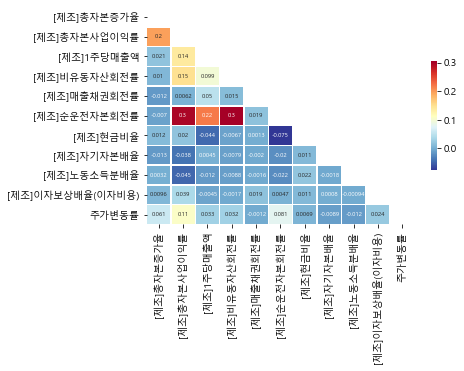

<Figure size 2880x2880 with 0 Axes>

In [36]:
corr_heatmap(data3)

In [ ]:
corr_heatmap(subset[nRatio])

NameError: name 'subset' is not defined

In [78]:
data3

,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),주가변동률
0,1.98,2.52,406.28,1.38,2.45,0.86,15.10,82.55,89.82,3.530000,0.268421
1,109.15,-9.65,332.74,1.48,1.85,0.42,68.81,95.69,1749.87,-7.750000,-0.172840
2,-2.09,2.81,235.52,1.47,2.07,0.42,394.63,113.12,71.28,0.700000,0.541076
3,3.86,1.25,262.65,0.96,1.86,0.56,101.24,113.13,79.30,3.600000,-0.634259
4,-2.64,-4.30,306.26,0.90,2.10,0.75,29.00,106.02,144.10,-32.220000,0.076923
...,...,...,...,...,...,...,...,...,...,...,...
9728,1.39,1.35,9589.39,2.24,29.72,8.24,40.08,4611.84,48.08,7.660000,0.311653
9729,0.98,0.97,10367.77,2.42,27.11,7.20,17.75,4650.29,47.63,5.910000,-0.207856
9730,-5.89,1.54,11080.55,2.62,31.01,8.08,105.67,4696.15,47.47,12.660000,-0.104882
9731,11.24,0.87,10044.58,2.44,31.51,6.91,49.75,5133.42,22.19,252.020000,0.251691


In [77]:
data3_1 = data3.copy()

In [76]:
data3 = data3_1

In [117]:
corr_df = data3.corr()
corr_df = corr_df.apply(lambda x: round(x ,6))
corr_df

,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),주가변동률
[제조]총자본증가율,1.000000,0.197861,0.020973,0.010316,-0.011689,-0.007003,0.012219,-0.012551,0.003193,0.009610,0.061245
[제조]총자본사업이익률,0.197861,1.000000,0.140909,0.151278,0.006183,0.299378,0.019724,-0.037986,-0.045452,0.039255,0.108961
[제조]1주당매출액,0.020973,0.140909,1.000000,0.099320,0.050101,0.221089,-0.044116,0.004536,-0.011820,-0.004537,0.032614
[제조]비유동자산회전률,0.010316,0.151278,0.099320,1.000000,0.014843,0.304446,-0.006730,-0.007915,-0.008751,-0.001681,0.032461
[제조]매출채권회전률,-0.011689,0.006183,0.050101,0.014843,1.000000,0.018663,0.001310,-0.002033,-0.001585,0.019243,-0.001162
[제조]순운전자본회전률,-0.007003,0.299378,0.221089,0.304446,0.018663,1.000000,-0.075404,-0.019957,-0.021511,0.004728,0.080635
[제조]현금비율,0.012219,0.019724,-0.044116,-0.006730,0.001310,-0.075404,1.000000,0.011266,0.022087,0.011496,0.006948
[제조]자기자본배율,-0.012551,-0.037986,0.004536,-0.007915,-0.002033,-0.019957,0.011266,1.000000,-0.001772,0.000796,-0.008931
[제조]노동소득분배율,0.003193,-0.045452,-0.011820,-0.008751,-0.001585,-0.021511,0.022087,-0.001772,1.000000,-0.000940,-0.011543
[제조]이자보상배율(이자비용),0.009610,0.039255,-0.004537,-0.001681,0.019243,0.004728,0.011496,0.000796,-0.000940,1.000000,0.024321


In [118]:
s = corr_df.unstack()
s = s['주가변동률']
s

[제조]총자본증가율          0.061245
[제조]총자본사업이익률        0.108961
[제조]1주당매출액          0.032614
[제조]비유동자산회전률        0.032461
[제조]매출채권회전률        -0.001162
[제조]순운전자본회전률        0.080635
[제조]현금비율            0.006948
[제조]자기자본배율         -0.008931
[제조]노동소득분배율        -0.011543
[제조]이자보상배율(이자비용)    0.024321
주가변동률               1.000000
dtype: float64

In [119]:
# Series이므로 DataFrame으로 변경한다. 
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='Blues')


,corr
[제조]총자본사업이익률,0.108961
[제조]순운전자본회전률,0.080635
[제조]총자본증가율,0.061245
[제조]1주당매출액,0.032614
[제조]비유동자산회전률,0.032461
[제조]이자보상배율(이자비용),0.024321
[제조]현금비율,0.006948
[제조]매출채권회전률,-0.001162
[제조]자기자본배율,-0.008931
[제조]노동소득분배율,-0.011543


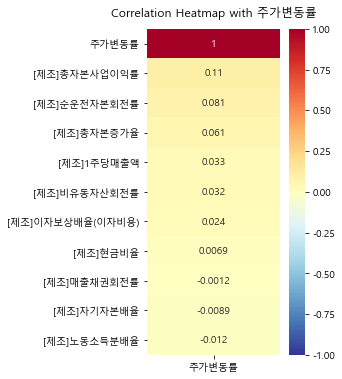

In [83]:
def col_corr_list(dataset, col_name):
    """[데이터 프레임 내 컬럼의 상관 관계를 보여주는 plot입니다.]

    Args:
        dataset ([DataFrame]): [데이터프레임을 입력해주세요]
        col_name ([column]): [데이터 내의 컬럼 이름을 입력해주세요]
    """
    # credit correlation을 크기별로 정렬하고 인덱스를 뽑습니다.
    y_label = dataset.corr()[[col_name]].sort_values(by=col_name,ascending=False).index.tolist()
    
    fig, ax = plt.subplots(figsize=(3, 6))
    sns.heatmap(dataset.corr()[[col_name]].sort_values(by=col_name,ascending=False), 
                vmin = -1, vmax = 1, annot=True, cmap="RdYlBu_r")
    ax.set_title('Correlation Heatmap with {}'.format(col_name), pad = 12)
    ax.set_yticklabels(y_label, rotation=0)
    plt.show()
    
col_corr_list(data3, '주가변동률')

In [ ]:
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

In [ ]:
# from scipy.stats.mstats import winsorize

# for col in data3.columns:
#      data3[col] = winsorize(data3[col], limits= 0.01)

In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import shapiro, kstest
list= [9000]
for i in list:
    df_3=data3.sample(n=i, random_state=10)
    for j in data3.columns:
        a = kstest(df_3[j],'norm')
        p = a.pvalue
    
        print(i,j,p)
     
        



9000 [제조]총자본증가율 0.0
9000 [제조]총자본사업이익률 0.0
9000 [제조]1주당매출액 0.0
9000 [제조]비유동자산회전률 0.0
9000 [제조]매출채권회전률 0.0
9000 [제조]순운전자본회전률 0.0
9000 [제조]현금비율 0.0
9000 [제조]자기자본배율 0.0
9000 [제조]노동소득분배율 0.0
9000 [제조]이자보상배율(이자비용) 0.0
9000 주가변동률 0.0


In [ ]:
data3_1 = data3.drop(columns='주가변동률')
data3_2 = data3['주가변동률']

In [ ]:
data3_1.columns[1]

'[제조]총자본사업이익률'

In [ ]:
df_columns =[]
df_cor = []
from scipy.stats import pearsonr
for i in data3_1.columns:
    data3_cor=pearsonr(data3_2, data3_1[i])
    data_columns = i
    df_cor.append(data3_cor)
    df_columns.append(data_columns)
    


In [ ]:
df_cor=df_cor.sort_values("상관계수값",ascending=False)
df_cor

AttributeError: 'list' object has no attribute 'sort_values'

In [ ]:
df_columns

['[제조]총자본증가율',
 '[제조]총자본사업이익률',
 '[제조]1주당매출액',
 '[제조]비유동자산회전률',
 '[제조]매출채권회전률',
 '[제조]순운전자본회전률',
 '[제조]현금비율',
 '[제조]자기자본배율',
 '[제조]노동소득분배율',
 '[제조]이자보상배율(이자비용)']

In [ ]:
y_label = df_cor.index.tolist()
y_label

['[제조]총자본사업이익률',
 '[제조]총자본증가율',
 '[제조]이자보상배율(이자비용)',
 '[제조]순운전자본회전률',
 '[제조]비유동자산회전률',
 '[제조]1주당매출액',
 '[제조]자기자본배율',
 '[제조]현금비율',
 '[제조]매출채권회전률',
 '[제조]노동소득분배율']

In [ ]:
df_cor.sort_values("상관계수값",ascending=False)

,상관계수값
피처,
[제조]총자본사업이익률,0.218423
[제조]총자본증가율,0.194483
[제조]이자보상배율(이자비용),0.171262
[제조]순운전자본회전률,0.131862
[제조]비유동자산회전률,0.117908
[제조]1주당매출액,0.098283
[제조]자기자본배율,0.063048
[제조]현금비율,0.033271
[제조]매출채권회전률,0.019928


AttributeError: 'builtin_function_or_method' object has no attribute 'tolist'

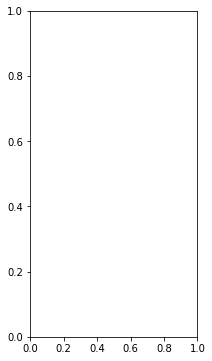

In [ ]:
fig, ax = plt.subplots(figsize=(3, 6))
y_label = df_cor.index.tolist()
sns.heatmap(df_cor.sort_values("상관계수값",ascending=False), 
            vmin = -1, vmax = 1, annot=True, cmap="RdYlBu_r")
ax.set_title('corelation Heatmap with {}'.format(df_columns), pad = 12)
ax.set_yticklabels(y_label, rotation=0)
plt.show()

In [ ]:
def col_cor_list(data3, col_name):
    """[데이터 프레임 내 컬럼의 상관 관계를 보여주는 plot입니다.]

    Args:
        data3 ([DataFrame]): [데이터프레임을 입력해주세요]
        col_name ([column]): [데이터 내의 컬럼 이름을 입력해주세요]
    """
    # credit corelation을 크기별로 정렬하고 인덱스를 뽑습니다.
    y_label = data3.cor()[[col_name]].sort_values(by=col_name,ascending=False).index.tolist()
    
    fig, ax = plt.subplots(figsize=(3, 6))
    sns.heatmap(data3.cor()[[col_name]].sort_values(by=col_name,ascending=False), 
                vmin = -1, vmax = 1, annot=True, cmap="RdYlBu_r")
    ax.set_title('corelation Heatmap with {}'.format(col_name), pad = 12)
    ax.set_yticklabels(y_label, rotation=0)
    plt.show()

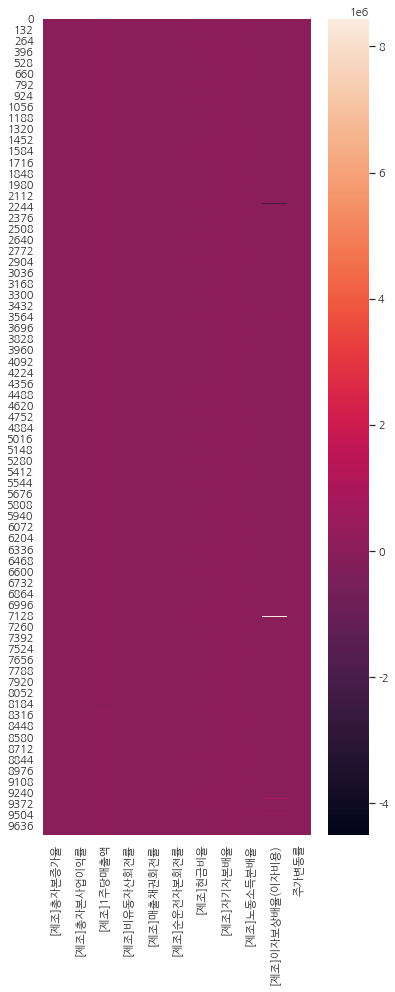

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 15))
ax = sns.heatmap(data3)

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
import matplotlib.pyplot as plt
df_cor = pd.DataFrame(df_cor)
df_coulmns= pd.DataFrame(df_columns)

# fig, ax = plt.subplots(1,2)
# df1.columns.names = ['상관계수값']
# df1.index.names = ['피처']


In [ ]:
df_cor["피처"] = df_coulmns

In [ ]:
df_cor=df_cor.set_index("피처")
df_cor.columns=["상관계수값"]

In [ ]:
# df_cor=df_cor.drop(index="종가(원)")


In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
df_cor=df_cor.sort_values("상관계수값", ascending=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# sns.color_palette("mako", as_cmap=True)
# df_cor.plot(kind='barh')


In [ ]:
df_cor= df_cor.reset_index()
df_cor

,피처,상관계수값
0,[제조]노동소득분배율,-0.037138
1,[제조]매출채권회전률,0.019928
2,[제조]현금비율,0.033271
3,[제조]자기자본배율,0.063048
4,[제조]1주당매출액,0.098283
5,[제조]비유동자산회전률,0.117908
6,[제조]순운전자본회전률,0.131862
7,[제조]이자보상배율(이자비용),0.171262
8,[제조]총자본증가율,0.194483
9,[제조]총자본사업이익률,0.218423


In [ ]:
data3.cor()[['주가변동률']]

AttributeError: 'DataFrame' object has no attribute 'cor'

ValueError: could not convert string to float: '[제조]총자본사업이익률'

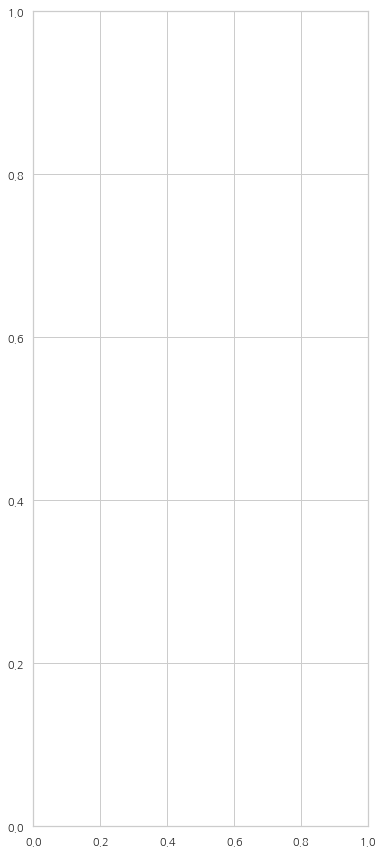

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
df_cor=df_cor.sort_values("상관계수값", ascending=False)



# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="상관계수값", y="피처", data=df_cor,palette="cool")

plt.savefig('./vy', transparent = True)
sns.heatmap(data3.cor()[[col_name]].sort_values(by=col_name,ascending=False), 
                vmin = -1, vmax = 1, annot=True, cmap="RdYlBu_r")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
df_cor=df_cor.sort_values("상관계수값", ascending=False)



# Plot the crashes where alcohol was involved

sns.barplot(x="상관계수값", y="피처", data=df_cor,palette="blues")

plt.savefig('./vy', transparent = True)



In [ ]:
def col_cor_list(data3, col_name):
    """[데이터 프레임 내 컬럼의 상관 관계를 보여주는 plot입니다.]

    Args:
        data3 ([DataFrame]): [데이터프레임을 입력해주세요]
        col_name ([column]): [데이터 내의 컬럼 이름을 입력해주세요]
    """
    # credit corelation을 크기별로 정렬하고 인덱스를 뽑습니다.
    y_label = data3.cor()[[col_name]].sort_values(by=col_name,ascending=False).index.tolist()
    
    fig, ax = plt.subplots(figsize=(3, 6))
    sns.heatmap(data3.cor()[[col_name]].sort_values(by=col_name,ascending=False), 
                vmin = -1, vmax = 1, annot=True, cmap="RdYlBu_r")
    ax.set_title('corelation Heatmap with {}'.format(col_name), pad = 12)
    ax.set_yticklabels(y_label, rotation=0)
    plt.show()

ValueError: blues is not a valid palette name

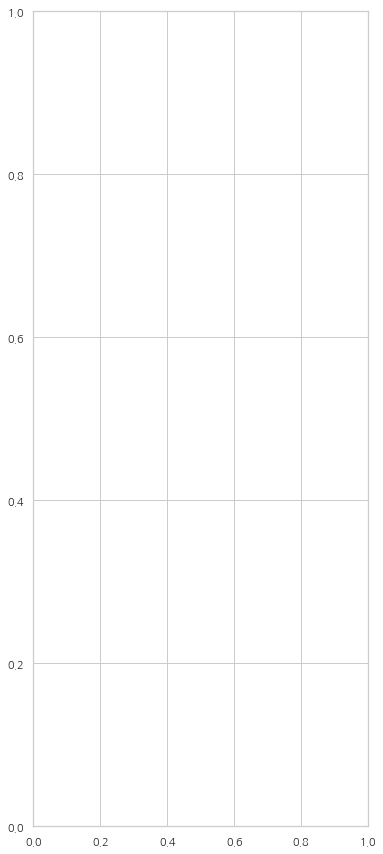

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
df_cor=df_cor.sort_values("상관계수값", ascending=False)



# Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
palette = sns.color_palette("blues")
sns.barplot(x="상관계수값", y="피처", data=df_cor)

plt.savefig('./vy', transparent = True)
